In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('carrot_NO_OUTLIERS.csv')

In [2]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")
df = df.set_index("DATE")

In [3]:
df = df.resample('1D').interpolate(mehod= "linear")

In [4]:
window_size = 7
data = df.rolling(window_size).mean()

In [5]:
for i in range(window_size):
    data['MODAL'][i] = df['MODAL'][i]
df = data

In [6]:
df = df.reset_index()

<AxesSubplot:ylabel='MODAL'>

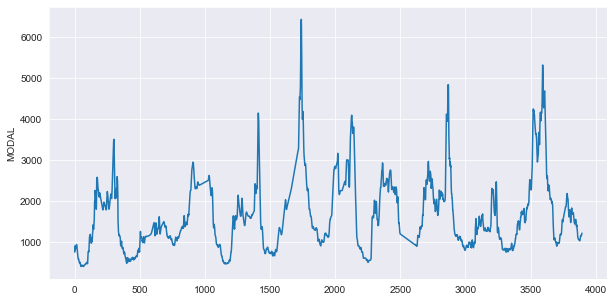

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data= df['MODAL'], ax= axes)

In [8]:
start_idx = df.index[df.DATE == '2012-01-01'][0]
end_idx = df.index[df.DATE == '2019-12-31'][0] + 1
data = df[start_idx:end_idx]
data = data.reset_index()
data

,index,DATE,Unnamed: 0,MODAL
0,730,2012-01-01,727.0,1136.122449
1,731,2012-01-02,728.0,1143.061224
2,732,2012-01-03,729.0,1146.326531
3,733,2012-01-04,730.0,1145.918367
4,734,2012-01-05,731.0,1141.836735
...,...,...,...,...
2917,3647,2019-12-27,3644.0,2142.857143
2918,3648,2019-12-28,3645.0,2142.857143
2919,3649,2019-12-29,3646.0,2121.428571
2920,3650,2019-12-30,3647.0,2096.428571


In [9]:
# df[df['DATE'] == data['DATE'][start_idx] - relativedelta(years=1)]
col = 'DATE'
one_year = []
second_year = []
for i in range(0, len(data[col])):
    diff1 = data[col][i] - relativedelta(years = 1)
    diff2 = data[col][i] - relativedelta(years = 2)
    if diff1 in df.values:
        one_year.append(df.loc[df[col] == diff1, 'MODAL'].iloc[0])
    else:
        one_year.append(None)
    if diff2 in df.values:
        second_year.append(df.loc[df[col] == diff2, 'MODAL'].iloc[0])
    else:
        second_year.append(None)

In [10]:
data = data.assign(one_year = one_year, second_year = second_year)

In [11]:
data.isnull().values.any()

False

In [12]:
df = data.drop(['index', 'DATE'], axis = 1)

In [13]:
col = df.columns
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data = x_scaled, columns = col)
df

,Unnamed: 0,MODAL,one_year,second_year
0,0.000000,0.113280,0.064744,0.058256
1,0.000342,0.114443,0.063547,0.058256
2,0.000685,0.114990,0.062949,0.083132
3,0.001027,0.114922,0.067736,0.066548
4,0.001369,0.114238,0.067137,0.074840
...,...,...,...,...
2917,0.998631,0.281953,0.065342,0.137031
2918,0.998973,0.281953,0.062949,0.132885
2919,0.999315,0.278363,0.060555,0.131700
2920,0.999658,0.274174,0.059359,0.129331


In [14]:
train_set, test_set = train_test_split(df,test_size=0.20,random_state=42)
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set['MODAL']
X_test = test_set.drop('MODAL', 1)

In [15]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 0.11504370109472975 Mean of MODAL: 0.22170231221295633
R2 score is 0.4575164994992059


In [16]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING:
Root MSE of the model: 0.12683199303869352 Mean of MODAL: 0.22172589835842446
R2 score is 0.3332098132342467


In [17]:
data

,index,DATE,Unnamed: 0,MODAL,one_year,second_year
0,730,2012-01-01,727.0,1136.122449,846.428571,750.000000
1,731,2012-01-02,728.0,1143.061224,839.285714,750.000000
2,732,2012-01-03,729.0,1146.326531,835.714286,900.000000
3,733,2012-01-04,730.0,1145.918367,864.285714,800.000000
4,734,2012-01-05,731.0,1141.836735,860.714286,850.000000
...,...,...,...,...,...,...
2917,3647,2019-12-27,3644.0,2142.857143,850.000000,1225.000000
2918,3648,2019-12-28,3645.0,2142.857143,835.714286,1200.000000
2919,3649,2019-12-29,3646.0,2121.428571,821.428571,1192.857143
2920,3650,2019-12-30,3647.0,2096.428571,814.285714,1178.571429


In [18]:
df = data.drop(['index'], axis = 1)

In [19]:
end_index = df.index[df.DATE == '2017-12-31'][0] + 1
train_set = df[0:end_index]
train_set = train_set.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2018-01-01'][0]
index2 = df.index[df.DATE == '2018-12-31'][0] + 1
test_set1 = df[index1:index2]
test_set1 = test_set1.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2019-01-01'][0]
index2 = df.index[df.DATE == '2019-12-31'][0] + 1
test_set2 = df[index1:index2]
test_set2 = test_set2.drop(['DATE'], axis = 1)

In [20]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set1['MODAL']
X_test = test_set1.drop('MODAL', 1)

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 636.7870082987948 Mean of MODAL: 1801.663218567328
R2 score is 0.4881115350134614


In [22]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2018 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2018 data:
Root MSE of the model: 596.2295387634554 Mean of MODAL: 1259.2500978473613
R2 score is -1.5714641226773152


In [23]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set2['MODAL']
X_test = test_set2.drop('MODAL', 1)

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 636.7870082987948 Mean of MODAL: 1801.663218567328
R2 score is 0.4881115350134614


In [25]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2019 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2019 data:
Root MSE of the model: 1102.9910840030113 Mean of MODAL: 2196.8639921722147
R2 score is 0.23913500573473734


<AxesSubplot:>

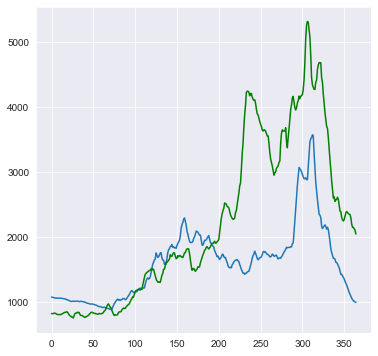

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(6,6))
sns.lineplot(data= lin_Y_test_predict.tolist(), ax= axes)
sns.lineplot(data= Y_test.tolist(), ax= axes, color = 'green')